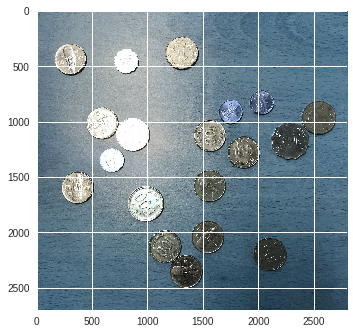

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ret = cv2.imread("IMG_8256.JPG")
roi = ret[500:3200,0:2800]

plt.imshow(roi)

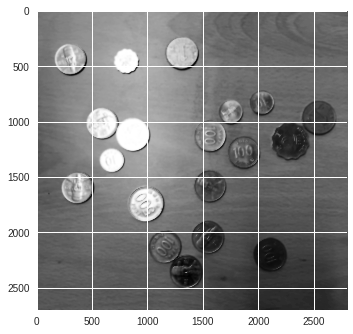

In [2]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray,23,101,101)
gray = cv2.GaussianBlur(gray, (13,11), 0)
gray_blur = cv2.medianBlur(gray,7)

plt.imshow(gray_blur, 'gray')

In [3]:
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 100, maxRadius = 180)
circles_rnd = np.uint16(np.around(circles))

print(circles_rnd.shape)

(1, 15, 3)


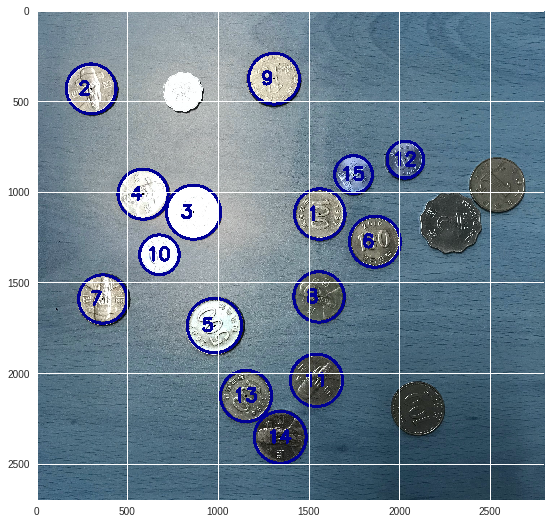

In [4]:
count = 1
for i in circles_rnd[0, :]:
    cv2.circle(roi, (i[0],i[1]),i[2],(0,0,150), 15)
    cv2.circle(roi, (i[0],i[1]),2,(0, 0, 0), 5)
    cv2.putText(roi, str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (0,0,150), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(roi)